## MI Exercise 3: Kernel PCA
Belugas on the Run: Anna & Leo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import OrderedDict

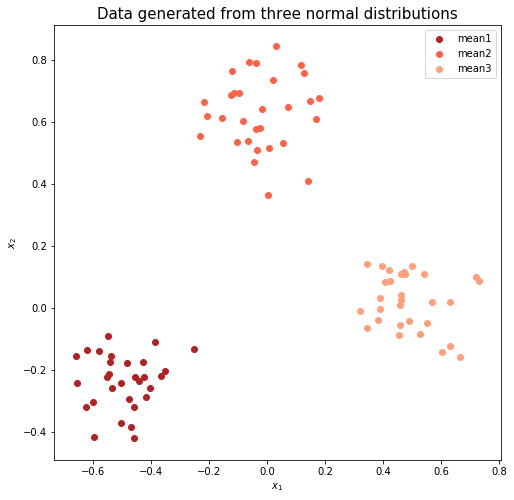

In [2]:
# Global variables for data generation:

SD = .1
COV = np.eye(2) * SD**2
mean1 = np.array([-.5,-.2])
mean2 = np.array([0,.6])
mean3 = np.array([.5,0])

means = [mean1, mean2, mean3]

#Generate data:

data = np.zeros((90,2))

colors = ['firebrick', 'tomato', 'lightsalmon']

plt.figure(figsize = (8,8))

for k in [1,2,3]:
    data[30*(k-1):30*k,:] = np.random.multivariate_normal(means[k-1], COV, 30)
    
    #Visualize the data a little bit:
    plt.scatter(data[30*(k-1):30*k,0], data[30*(k-1):30*k,1], c=colors[k-1], label= "mean{}".format(k))
    plt.title("Data generated from three normal distributions", fontsize = 15)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.legend()

[[ 2.23301254e-03  2.21383923e-03  2.17889030e-03  2.13186823e-03]
 [ 6.37514434e-03  6.36668895e-03  6.35124749e-03  6.33042497e-03]
 [ 3.46156373e-03  3.46162141e-03  3.46149435e-03  3.46094427e-03]
 [-6.64553982e-05 -6.63592148e-05 -6.64220183e-05 -6.68946140e-05]
 [ 4.09079388e-03  4.09070562e-03  4.09038361e-03  4.08968797e-03]
 [-1.48927830e-03 -1.50714066e-03 -1.52346597e-03 -1.51945989e-03]
 [-3.22159341e-03 -3.32350139e-03 -3.51068430e-03 -3.76323708e-03]
 [ 4.67690563e-03  4.67573188e-03  4.67349153e-03  4.67033490e-03]]


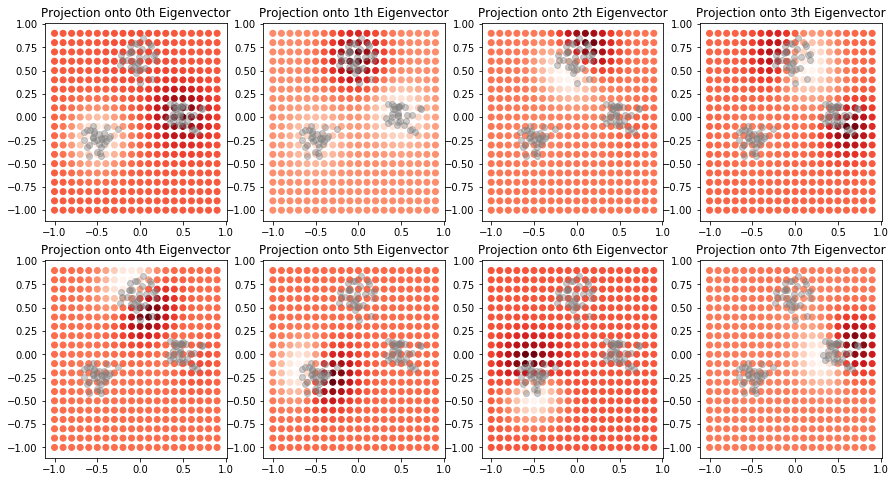

In [3]:
kernel1 = lambda x, x2, sigma = .2: np.exp(-np.linalg.norm(x - x2)**2 / (2 *sigma**2))

def kernel_pca(kernel, data, dt=.1):
    
    '''
    Performs kernel pca on a given dataset:
    @params:
    kernel: the kernel function to use
    data: the data on which to perform pca
    @Algorithm:
    1. Compute the kernel matrix by applying the kernel to every pair of data points
    2. Normalise the kernel matrix (i.e. center)
    3. Perform PCA 
    4. Normalise the resulting eigenvectors
    '''
    
    p = data.shape[0]
    
    K = np.zeros((p,p))
    #Compute the kernel matrix:
    
    for row in range(p):
        for col in range(p):
            K[row,col] = kernel(data[row,:], data[col,:])
            K[col,row] = K[row,col]
    
    #Normalize the kernel matrix: K_ab - ath-row average - bth column average + 1/p * overall average:
    
    K_norm = K - K.mean(axis=1) - K.mean(axis=0)[:,np.newaxis][:K.shape[1],] + K.mean()
    
    #Perform pca:
    
    evals, evecs = np.linalg.eig(K_norm)
    evals, evecs = evals[np.argsort(evals)[::-1]], evecs[np.argsort(evals)[::-1]]
    
    #Normalize Eigenvectors
    
    evecs = evecs / np.sqrt(90 * np.where(np.isnan(evals), 0, evals))
    
    #Initialise grid of testpoints:
    
    ab, cd = np.meshgrid(np.arange(-1,1,dt), np.arange(-1,1,dt))
    
    grid = np.zeros((400,2))
    
    grid[:,0] = ab.flatten()
    grid[:,1] = cd.flatten()
    
    #Center the grid:
    
    grid - grid.mean(axis=0)
    
    #Calculate projections of test points onto eigenvectors:
    
    contour = np.zeros((8,400))
    
    for k in range(8):
        for x in range(grid.shape[0]):
            
            kern = np.array([kernel(point, grid[x,:]) for point in data])
            #Normalise
            kern = kern - K.mean(axis=0) - K.mean(axis=1) + K.mean()
            contour[k,x] = evecs[:,k] @ kern
            
    print(contour[:,:4])
    
    fig, axs = plt.subplots(2,4, figsize=(15,8))
    
    for i in range(2):
        for j in range(4):
            
            axs[i,j].scatter(grid[:,0], grid[:,1], c=contour[i*4 + j % 4,:], cmap = 'Reds')
            axs[i,j].set_title("Projection onto {}th Eigenvector".format(i*4 + j % 4))
            axs[i,j].scatter(data[:,0], data[:,1], color = 'gray', alpha = .4)
            
            
    
            
    
        
    return None



kernel_pca(kernel1, data)



The results show that the kernel trick works pretty well here. Each of these PCs seems to identify one of the samples from the original data. Generally, kernel PCA is useful whenever the data aren't seperable in $N$ dimension. Thus, whenever a dataset isn't linearly separable, kernel PCA would be a good alternatie to PCA. Potentially it could also be used to identify (as we sort of did here) when data have been drawn from or follow different probability distributions. Such a situation could arise from a variety of different experimental settings.